In [1]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_healthy = "Datasets/Kaggle/Train/Train/Healthy"
train_powdery = "Datasets/Kaggle/Train/Train/Powdery"
train_rust = "Datasets/Kaggle/Train/Train/Rust"

test_healthy = "Datasets/Kaggle/Test/Test/Healthy"
test_powdery = "Datasets/Kaggle/Test/Test/Powdery"
test_rust = "Datasets/Kaggle/Test/Test/Rust"

valid_healthy = "Datasets/Kaggle/Validation/Validation/Healthy"
valid_powdery = "Datasets/Kaggle/Validation/Validation/Powdery"
valid_rust = "Datasets/Kaggle/Validation/Validation/Rust"

print("Number of healthy leaf images in training set", total_files(train_healthy))
print("Number of powder leaf images in training set", total_files(train_powdery))
print("Number of rusty leaf images in training set", total_files(train_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_healthy))
print("Number of powder leaf images in test set", total_files(test_powdery))
print("Number of rusty leaf images in test set", total_files(test_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_healthy))
print("Number of powder leaf images in validation set", total_files(valid_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


In [ ]:
from PIL import Image
import IPython.display as display

image_path = "Datasets/Kaggle/Train/Train/Rust/8abc65c20f33e4da.jpg"

with open(image_path, "rb") as f:
    display.display(display.Image(data=f.read(), width=500))

another_path = "Datasets/Kaggle/Validation/Validation/Powdery/9b9832ecbd60702f.jpg"

with open(another_path, "rb") as f:
    display.display(display.Image(data=f.read(), width=500))

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('Datasets/Kaggle/Train/Train', target_size=(225, 225), batch_size=32, class_mode='categorical', shuffle=True)

validation_generator = validate_datagen.flow_from_directory('Datasets/Kaggle/Validation/Validation', target_size=(225, 225), batch_size=32, class_mode='categorical', shuffle=True)

test_generator = test_datagen.flow_from_directory('Datasets/Kaggle/Test/Test', target_size=(225, 225), batch_size=32, class_mode='categorical' , shuffle=False)

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [4]:
from keras.applications import ResNet101
from keras.models import Sequential
from keras.layers import Dense, AveragePooling2D, Flatten #GlobalAveragePooling2D
from keras.metrics import Precision, Recall

resnet101_base = ResNet101(weights='imagenet', include_top=False, input_shape=(225, 225, 3))
for layer in resnet101_base.layers:
    layer.trainable = False

model = Sequential()
model.add(resnet101_base)
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [5]:
model.build(input_shape=(None, 225, 225, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet101 (Functional)          │ (None, 8, 8, 2048)     │    42,658,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 4, 4, 2048)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        98,307 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,756,483 (163.10 MB)

 Trainable params: 98,307 (384.01 KB)

 Non-trainable params: 42,658,176 (162.73 MB)

In [6]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/10


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.3761 - loss: 2.6291 - precision: 0.3761 - recall: 0.3418 - val_accuracy: 0.3167 - val_loss: 1.5542 - val_precision: 0.3167 - val_recall: 0.3167
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.3986 - loss: 1.2215 - precision: 0.4185 - recall: 0.2839 - val_accuracy: 0.4500 - val_loss: 1.0361 - val_precision: 0.4884 - val_recall: 0.3500
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.4839 - loss: 1.0196 - precision: 0.5592 - recall: 0.3222 - val_accuracy: 0.4500 - val_loss: 1.3709 - val_precision: 0.4561 - val_recall: 0.4333
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.4641 - loss: 1.1085 - precision: 0.5092 - recall: 0.3722 - val_accuracy: 0.5167 - val_loss: 1.3405 - val_precision: 0.5179 - val_recall: 0.4833
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.5176 - loss: 1.1047 - precision: 0.5518 - recall: 0.4342 - val_accuracy: 0.5333 - val_loss: 0.9608 - val_preci

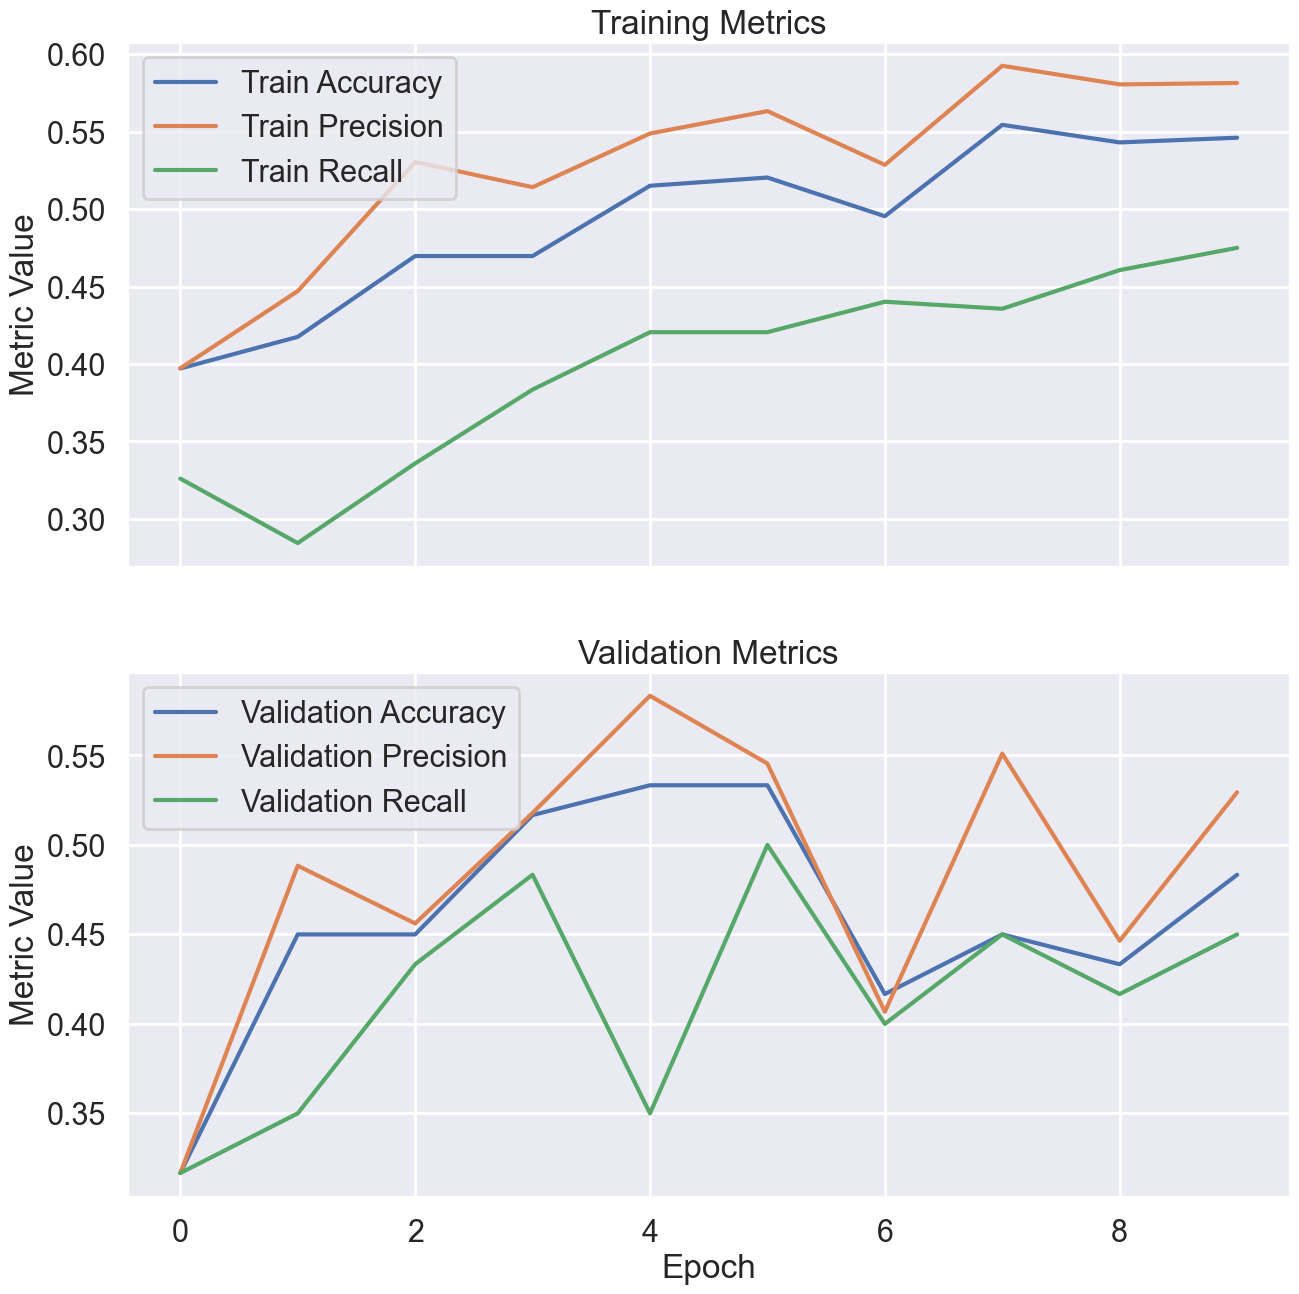

In [7]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15), dpi=100, sharex=True)

ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['precision'], label='Train Precision')
ax1.plot(history.history['recall'], label='Train Recall')
ax1.set_title('Training Metrics')
ax1.set_ylabel('Metric Value')
ax1.legend(loc='upper left')

ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.plot(history.history['val_precision'], label='Validation Precision')
ax2.plot(history.history['val_recall'], label='Validation Recall')
ax2.set_title('Validation Metrics')
ax2.set_ylabel('Metric Value')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper left')

plt.show()

In [13]:
from sklearn.metrics import classification_report

test_results = model.evaluate(test_generator)
test_predictions = model.predict(test_generator)
true_labels = test_generator.labels

report = classification_report(true_labels, test_predictions.argmax(axis=1), digits=5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5831 - loss: 1.0913 - precision: 0.6133 - recall: 0.5663
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step


In [14]:
print(true_labels)
print(test_predictions.argmax(axis=1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 2 0 2 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 2 2 2 2 0 2 0 2 2 2 2 2 0 2 2 0 0 2 2
 0 2 0 2 2 0 2 2 2 2 2 0 0 0 2 2 2 1 2 2 0 2 0 2 0 0 0 2 2 2 2 2 2 2 0 0 0
 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 2 2 2 2 0 0 0 2 0 2 0 2 2 2 0 0 2 2 0
 2 2]


In [15]:
print(report)

              precision    recall  f1-score   support

           0    0.50562   0.90000   0.64748        50
           1    1.00000   0.02000   0.03922        50
           2    0.40000   0.48000   0.43636        50

    accuracy                        0.46667       150
   macro avg    0.63521   0.46667   0.37435       150
weighted avg    0.63521   0.46667   0.37435       150



In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

image_path = "Datasets/Kaggle/Test/Test/Powdery/9e0ba1619bdf4943.jpg"
x = preprocess_image(image_path)

predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([0.2893603, 0.119261 , 0.5913787], dtype=float32)

In [19]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
